# Part 2: Let's Help Santa

In [2]:
library("igraph")

### Question 6:

In [7]:
g <- read.graph("./data/uber/uberGraph.txt", format="ncol", directed=FALSE)
info <- sprintf("It has %d nodes and %d edges", vcount(g), ecount(g))
cat(info)

It has 1887 nodes and 311812 edges

In [8]:
# Add attributes

ID_streetName <- rep("", vcount(g))
ID_coordinate <- rep(list(c(1, 2)), vcount(g))
file_uberGraph_info <- file("./data/uber/uberGraph_info.txt", open="r")
line <- readLines(file_uberGraph_info, 1, encoding="latin1")

while(length(line) != 0) {
    line <- strsplit(line, "\t\t")
    ID <- line[[1]][1]
    streetName <- line[[1]][2]
    coordinate <- list(c(as.numeric(line[[1]][3]), as.numeric(line[[1]][4])))

    node_id <- V(g)[V(g)$name == ID]
    ID_streetName[node_id] <- streetName
    ID_coordinate[node_id] <- coordinate
    
    line <- readLines(file_uberGraph_info, 1, encoding="latin1")
} 

close(file_uberGraph_info)
V(g)$displayName <- ID_streetName
V(g)$location <- ID_coordinate

In [9]:
g.components <- clusters(g)
giant.idx <- which.max(g.components$csize)
g <- induced.subgraph(g, which(g.components$membership == giant.idx))

info <- sprintf("It has %d nodes and %d edges", vcount(g), ecount(g))
cat(info)

It has 1880 nodes and 311802 edges

### Question 7:

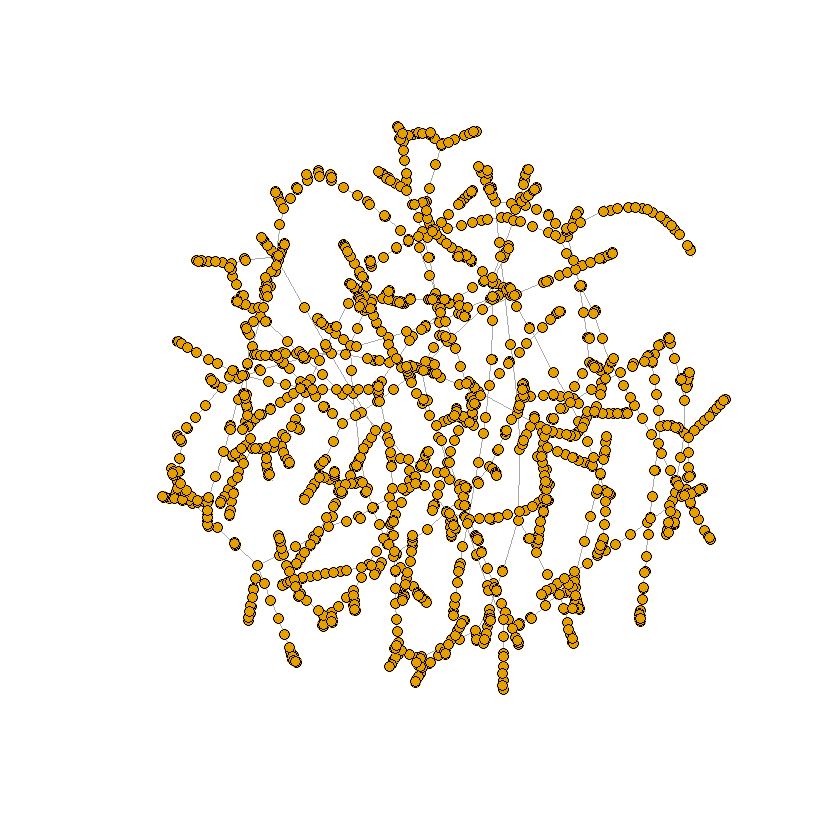

In [14]:
MST <- mst(g)
plot(MST, vertex.label=NA, vertex.size=4)

In [28]:
idx <- 1:ecount(MST)
idx_sample <- sample(idx, size=10, replace=FALSE)

for(ID in idx_sample){
    source <- V(MST)[get.edges(MST, E(MST)[ID])[1]]
    target <- V(MST)[get.edges(MST, E(MST)[ID])[2]]
    
    info <- sprintf("%s --- %s Takes %f seconds\n", source$displayName, target$displayName, E(MST)[ID]$weight)
    cat(info)
}

1800 Cedar Street, Upper B Street, Hayward --- 22000 Cameron Street, Castro Valley Takes 169.040000 seconds
100 Los Patios, Los Gatos --- 900 West Parr Avenue, San Tomas, Campbell Takes 118.805000 seconds
J. Arthur Younger Freeway, Foster City --- 900 Baker Way, East San Mateo, San Mateo Takes 125.625000 seconds
500 Aldo Avenue, Santa Clara --- 4100 Network Circle, Santa Clara Takes 187.495000 seconds
1300 Holly Avenue, Los Altos --- 1100 Jamestown Drive, Sunnyvale West, Sunnyvale Takes 68.255000 seconds
Uptown Alley, Central Sacramento, Sacramento --- Uptown Alley, Central Sacramento, Sacramento Takes 62.570000 seconds
3900 West Rincon Avenue, West San Jose, Campbell --- 1200 Latimer Avenue, Campbell Takes 110.325000 seconds
800 Hibiscus Lane, West San Jose, San Jose --- 3700 Rhoda Drive, West San Jose, San Jose Takes 140.655000 seconds
5100 Diane Lane, Livermore --- 5500 Stockton Loop, Livermore Takes 167.815000 seconds
0 Rossi Avenue, Richmond District, San Francisco --- 2500 Turk S

### Question 8: